## Spam and Ham Prediction
- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [2]:
# reading dataset
df = pd.read_csv('/Users/sakshimunde/Downloads/spam-2.csv',encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# reading columns
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [4]:
# lets see the dimension of the dataset
df.shape

(5572, 5)

- There are 5572 rows and 5 columns in the dataset.

In [5]:
df = df.drop_duplicates()

In [6]:
df.shape

(5169, 5)

In [7]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5169 non-null   object
 1   v2          5169 non-null   object
 2   Unnamed: 2  43 non-null     object
 3   Unnamed: 3  10 non-null     object
 4   Unnamed: 4  5 non-null      object
dtypes: object(5)
memory usage: 242.3+ KB


In [8]:
# Checking if there null values or not
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

- Unnamed: 2,Unnamed: 3 & Unnamed: 4 columns are having more null values. So it would be better to drop them.
### Dropping columns

In [9]:
df = df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# rename the columns v1 and v2

df.columns = ['label','message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# statistical view of dataset
df.describe()

,label,message
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [12]:
df['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

## Data visualisation

Text(0.5, 1.0, 'Distribution of spam and ham messages')

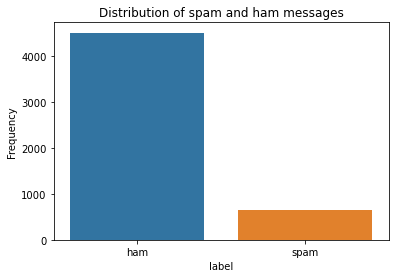

In [13]:
# Let's create a count plot to visualise the distribution of spam and ham messages

sns.countplot(data = df, x = 'label')

plt.ylabel("Frequency")
plt.title("Distribution of spam and ham messages")

- There are 653 spam mails.

In [14]:
# binary encoding : 

df['label'] = df['label'].apply(lambda x : 1 if x=='spam' else 0)
df['label'] = df['label'].astype(int)
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Model Building

In [15]:
# Split the data into features (X) and labels (y)

X = df['message']
y = df['label']

In [16]:
# Splitting data into train ans test split

X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 43)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4135,), (4135,), (1034,), (1034,))

In [17]:
# TF - IDF Vectorizer 

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_train_count

<4135x7616 sparse matrix of type '<class 'numpy.int64'>'
	with 54286 stored elements in Compressed Sparse Row format>

In [18]:
X_test_count = vectorizer.transform(X_test)   # We don't fit on test dataset

In [19]:
# Multinomial Naive Bayes Model

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_count, y_train)

MultinomialNB()

In [20]:
y_pred_train = model.predict(X_train_count)
y_pred = model.predict(X_test_count)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [21]:
# MOdel Evaluation

accuracy = accuracy_score(y_test,y_pred)
accuracy*100

98.64603481624758

Text(33.0, 0.5, 'Actual')

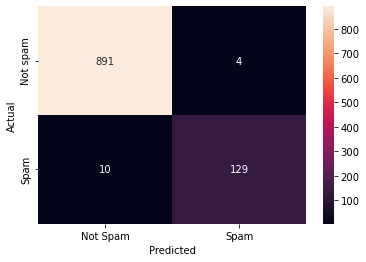

In [22]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True, fmt ='d', xticklabels = ['Not Spam', 'Spam'],yticklabels = ['Not spam','Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [23]:
# CLassification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.93      0.95       139

    accuracy                           0.99      1034
   macro avg       0.98      0.96      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [24]:
# Calculate the AUC-ROC (Area Under the Receiver Operating Characteristic) score for both training and test data

from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train, y_pred_train)
test_auc = roc_auc_score(y_test, y_pred)

In [25]:
train_auc

0.982082200995705

In [26]:
test_auc

0.9617941401069089

In [27]:
X = vectorizer.transform(df['message'])
X

<5169x7616 sparse matrix of type '<class 'numpy.int64'>'
	with 66906 stored elements in Compressed Sparse Row format>

In [28]:
df['Predictions'] = model.predict(X)

In [29]:
df.head()

,label,message,Predictions
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [30]:
# The messages that were spam but were treated as not spam

spam_msgs = df[(df['Predictions'] == 0) & (df['label'] == 1)]['message'] 
                                                                #predicted not spam but where actually spam 
for msgs in spam_msgs:
    print(msgs)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
Can U get 2 phone NOW? I wanna chat 2 set up meet Call me NOW on 09096102316 U can cum here 2moro Luv JANE xx Callså£1/minmoremobsEMSPOBox45PO139WA
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
This message is brought to you by GMW Ltd. and is not connected to the
Hello darling how are you today? I would love to have a chat, why dont you 

In [31]:
# The msgs that were not spam but treated as spam

not_spam = df[(df['Predictions']==1) & (df['label']==0)]['message']  # predicted as spam but where actually not spam
for msg in not_spam:
    print(msg)

Waiting for your call.
26th OF JULY
Can u get pic msgs to your phone?
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Total video converter free download type this in google search:)
Madam,regret disturbance.might receive a reference check from DLF Premarica.kindly be informed.Rgds,Rakhesh,Kerala.
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Have you laid your airtel line to rest?
I liked the new mobile
Anytime...
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..


## Creating a word cloud

In [32]:
spam_message = df[df['label']==1]['message']
spam_text = ''.join(spam_message)


In [33]:
word_cloud = WordCloud(width = 800, height = 600, background_color = 'white').generate(spam_text)
word_cloud

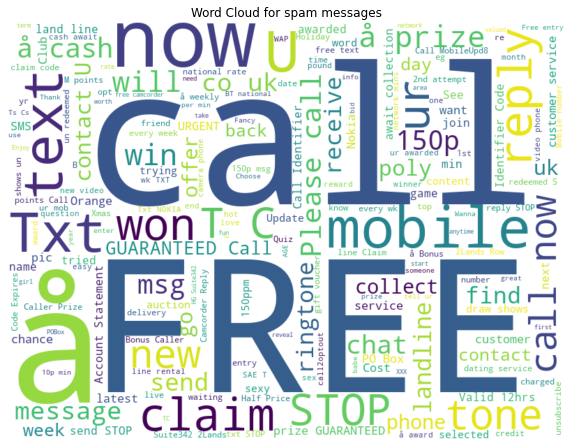

In [34]:
# Keywords that were more frequently used in spam msgs

plt.figure(figsize = [10,10])
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud for spam messages")
plt.show()